In [1]:
from spacerocks import SpaceRock, Units

from astroquery.jplhorizons import Horizons

from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
units = Units()
units.timescale = 'tdb' # JPL gives elements in TDB. This actually matters for precise ephemerides.
units.current()

Quantity             Unit           
---------------------------------------
distance             AU             
angle                deg            
timescale            tdb            
timeformat           None           
speed                AU / d         
size                 km             
density              g / cm3        
mass                 kg             
ra                   deg            
dec                  deg            


In [3]:
rock = SpaceRock(a=2.765985763166805, 
                 e=0.07821081922804583, 
                 inc=10.58793079235974, 
                 node=80.27114319577151, 
                 arg=73.73012101495385, 
                 M=210.8992101403974, 
                 epoch=2459225.5, 
                 H=3.53,
                 G=0.12,
                 name='Ceres',
                 origin='sun',
                 units=units)

In [4]:
startdate = Time('2000-01-01', scale='utc', format='iso')
testdates = Time(np.arange(startdate.jd, startdate.jd + 50 * 365.25, 30), scale='utc', format='jd')

In [5]:
units.timescale = 'utc'
prop, planets, sim = rock.propagate(epochs=testdates.jd, model=2, units=units)

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 280 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 280 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 3080 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [14]:
prop.__dict__

{'frame': 'eclipJ2000',
 'origin': 'sun',
 'mu': <Quantity 0.00029631 AU3 rad2 / d2>,
 'epoch': <Time object: scale='tdb' format='jd' value=[2451544.50074287 2451574.50074288 2451604.50074289 2451634.50074289
  2451664.50074289 2451694.50074288 2451724.50074287 2451754.50074286
  2451784.50074286 2451814.50074285 2451844.50074285 2451874.50074286
  2451904.50074287 2451934.50074288 2451964.50074289 2451994.50074289
  2452024.50074289 2452054.50074288 2452084.50074287 2452114.50074286
  2452144.50074286 2452174.50074285 2452204.50074285 2452234.50074286
  2452264.50074287 2452294.50074288 2452324.50074288 2452354.50074289
  2452384.50074289 2452414.50074288 2452444.50074288 2452474.50074287
  2452504.50074286 2452534.50074285 2452564.50074285 2452594.50074286
  2452624.50074286 2452654.50074287 2452684.50074288 2452714.50074289
  2452744.50074289 2452774.50074288 2452804.50074288 2452834.50074287
  2452864.50074286 2452894.50074285 2452924.50074285 2452954.50074286
  2452984.50074286 24

In [13]:
for _ in range(100):
    obs = prop.observe(obscode='W84')
    print(obs.ra.deg[10])

227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781
227.0594177369781


KeyboardInterrupt: 

In [7]:
rock_id = 'Ceres'
ephem_Horizons = Horizons(id=rock_id, location='W84',
                          epochs={'start':testdates[0].iso, 
                                  'stop':testdates[-1].iso, 
                                  'step':'30d'}).ephemerides()

/usr/local/bin/anaconda/envs/spacerocks/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [8]:
pos_Horizons = SkyCoord(ephem_Horizons['RA'], ephem_Horizons['DEC'], frame='icrs', unit=(u.deg, u.deg))
pos_pred = SkyCoord(obs.ra.deg, obs.dec.deg, frame='icrs', unit=(u.deg, u.deg))
sep = pos_pred.separation(pos_Horizons)

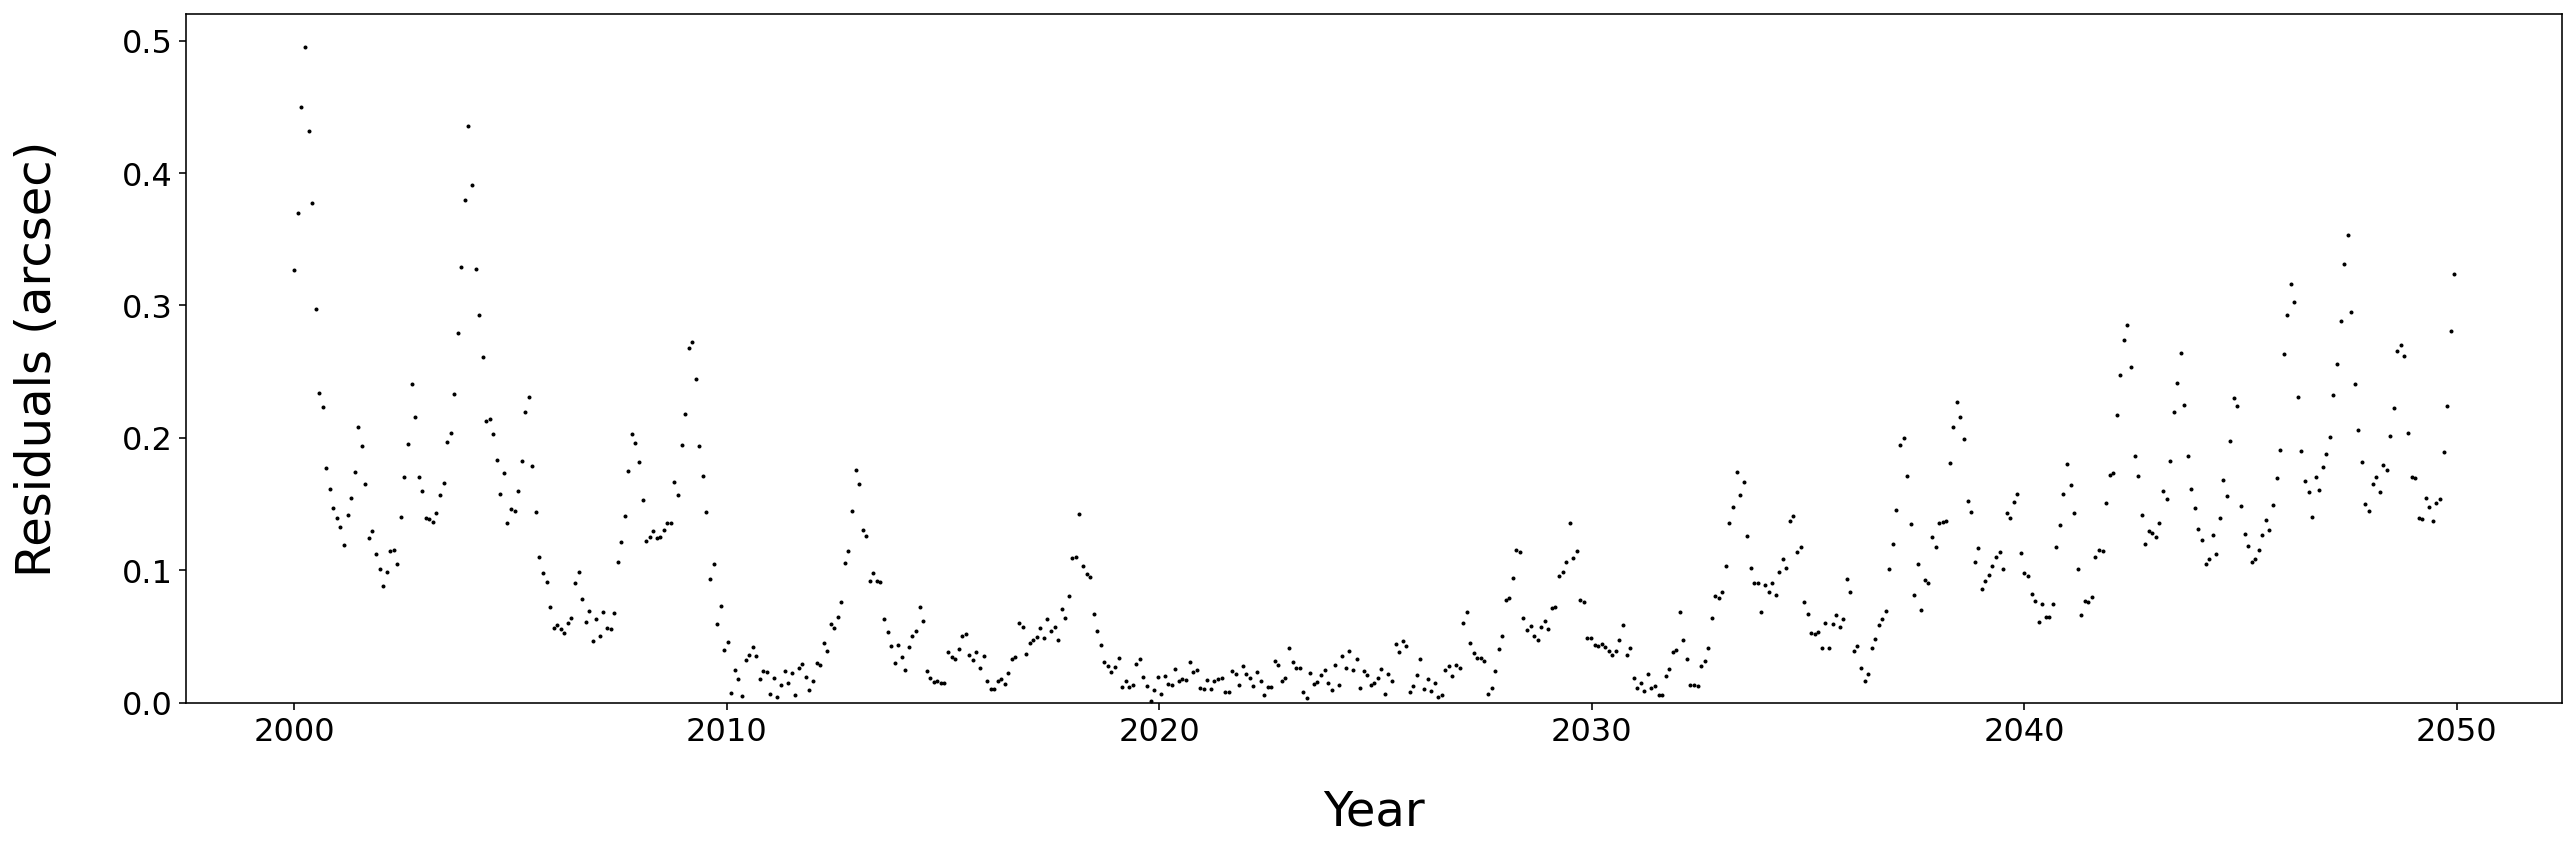

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))

ax.scatter(prop.epoch.decimalyear, sep.arcsec, color='black', s=1)

ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=24, labelpad=20)
ax.set_ylabel('Residuals (arcsec)', fontsize=24, labelpad=30)
ax.set_ylim(bottom=0)
fig.tight_layout()